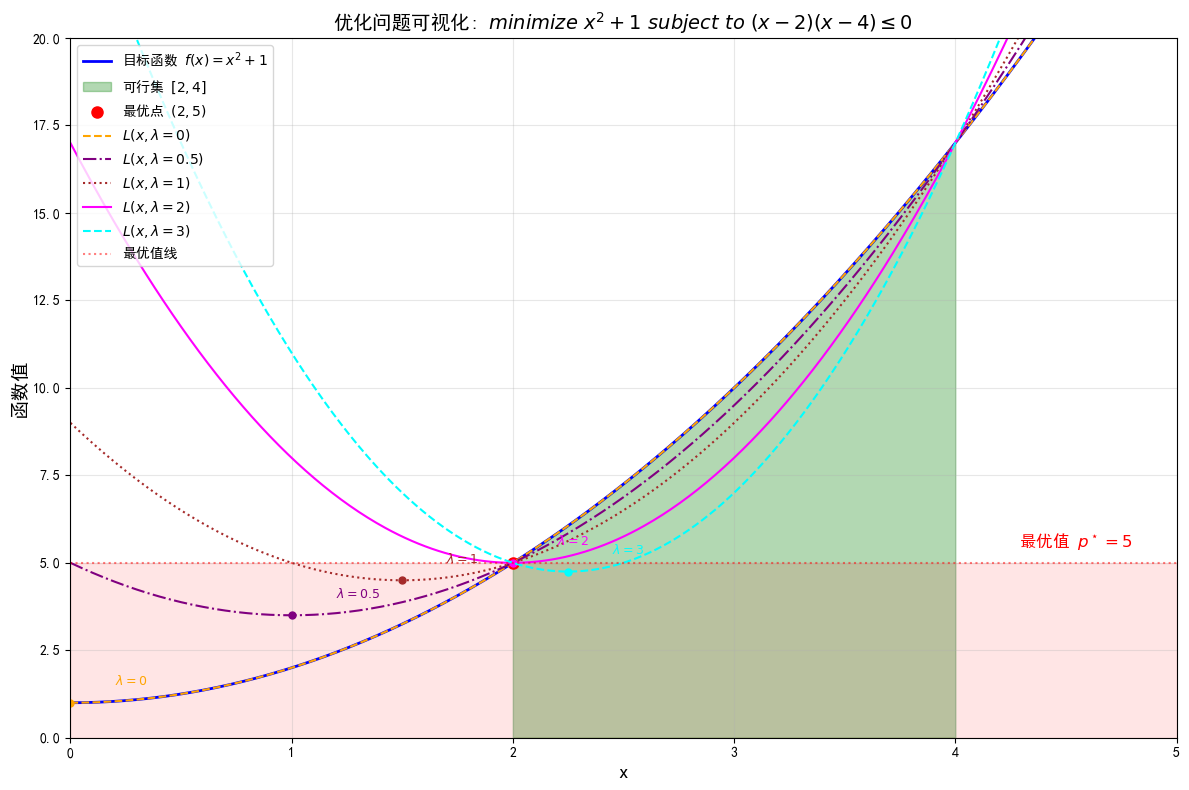

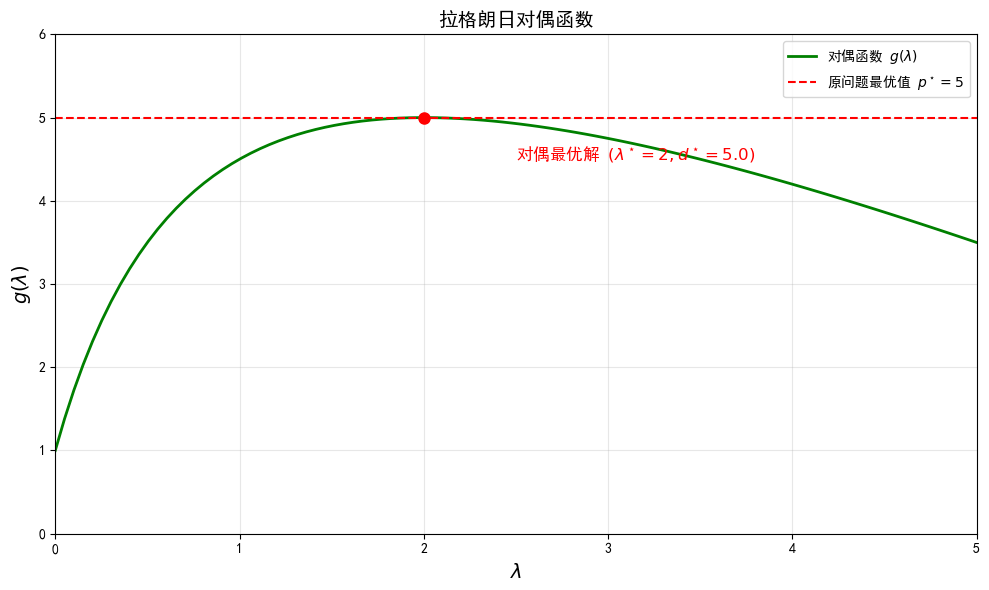

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 创建图形和坐标轴
fig, ax = plt.subplots(figsize=(12, 8))

# 定义x范围
x = np.linspace(0, 5, 500)

# 1. 绘制目标函数 f(x) = x^2 + 1
f_x = x**2 + 1
ax.plot(x, f_x, 'b-', linewidth=2, label='目标函数 $f(x) = x^2 + 1$')

# 2. 标出可行集 [2, 4]
feasible_x = np.linspace(2, 4, 100)
feasible_f = feasible_x**2 + 1
ax.fill_between(feasible_x, feasible_f, alpha=0.3, color='green', label='可行集 $[2, 4]$')

# 3. 标出最优点和最优值
optimal_x = 2
optimal_f = optimal_x**2 + 1
ax.plot(optimal_x, optimal_f, 'ro', markersize=8, label=f'最优点 $(2, {optimal_f})$')

# 添加最优值的标注：放在图像右侧、y=5 的正上方一点点
ax.annotate(f'最优值 $p^\\star = {optimal_f}$',
            xy=(optimal_x, optimal_f),
            xytext=(4.8, 5.3),  # 数据坐标：靠近右侧且略高于 5
            xycoords='data',
            textcoords='data',
            fontsize=12, color='red',
            horizontalalignment='right',
            verticalalignment='bottom')

# 4. 定义拉格朗日函数 L(x,λ) = x^2 + 1 + λ(x-2)(x-4)
def lagrangian(x, lambda_val):
    return x**2 + 1 + lambda_val * (x-2) * (x-4)

# 5. 绘制不同λ值对应的拉格朗日函数曲线
lambda_values = [0, 0.5, 1, 2, 3]
colors = ['orange', 'purple', 'brown', 'magenta', 'cyan']
line_styles = ['--', '-.', ':', '-', '--']

for i, lambda_val in enumerate(lambda_values):
    L_x = lagrangian(x, lambda_val)
    ax.plot(x, L_x, color=colors[i], linestyle=line_styles[i], 
            linewidth=1.5, label=f'$L(x, \\lambda={lambda_val})$')
    
    # 标记每个拉格朗日函数的最小值点
    min_x = (3 * lambda_val) / (1 + lambda_val) if lambda_val != -1 else 0
    min_L = lagrangian(min_x, lambda_val)
    ax.plot(min_x, min_L, 'o', color=colors[i], markersize=5)
    
    # 添加λ值标注
    ax.annotate(f'$\\lambda={lambda_val}$', 
                xy=(min_x, min_L), 
                xytext=(min_x+0.2, min_L+0.5),
                fontsize=9, color=colors[i])

# 6. 添加水平线表示最优值
ax.axhline(y=optimal_f, color='red', linestyle=':', alpha=0.5, label='最优值线')

# 7. 设置图形属性
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('函数值', fontsize=14)
ax.set_title('优化问题可视化: $minimize\\ x^2+1\\ subject\\ to\\ (x-2)(x-4)\\leq 0$', fontsize=14)
ax.grid(True, alpha=0.3)
ax.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize=10)
ax.set_xlim(0, 5)
ax.set_ylim(0, 20)

# 9. 突出显示关键区域
# 在最优值线下方添加阴影区域，表示下界性质
ax.fill_between(x, 0, optimal_f, where=(x>=0), alpha=0.1, color='red')

plt.tight_layout()
plt.show()

# 额外：单独显示拉格朗日函数最小值的变化
fig2, ax2 = plt.subplots(figsize=(10, 6))

# 计算对偶函数 g(λ) = inf_x L(x,λ)
lambda_range = np.linspace(0, 5, 100)
dual_function = []

for lam in lambda_range:
    if lam == -1:  # 避免除以零
        continue
    min_x = (3 * lam) / (1 + lam)
    min_value = lagrangian(min_x, lam)
    dual_function.append(min_value)

ax2.plot(lambda_range[:len(dual_function)], dual_function, 'g-', linewidth=2, label='对偶函数 $g(\\lambda)$')
ax2.axhline(y=optimal_f, color='red', linestyle='--', label='原问题最优值 $p^\\star = 5$')
ax2.set_xlabel('$\\lambda$', fontsize=14)
ax2.set_ylabel('$g(\\lambda)$', fontsize=14)
ax2.set_title('拉格朗日对偶函数', fontsize=14)
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.set_xlim(0, 5)
ax2.set_ylim(0, 6)

# 标记对偶最优解
lambda_opt = 2
g_lambda_opt = lagrangian((3*lambda_opt)/(1+lambda_opt), lambda_opt)
ax2.plot(lambda_opt, g_lambda_opt, 'ro', markersize=8)
ax2.annotate(f'对偶最优解 $(\\lambda^\\star={lambda_opt}, d^\\star={g_lambda_opt})$', 
             xy=(lambda_opt, g_lambda_opt), 
             xytext=(lambda_opt+0.5, g_lambda_opt-0.5),
             fontsize=12, color='red')

plt.tight_layout()
plt.show()